In [101]:
import numpy as np
import calendar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(15,7))

In [78]:
df=pd.read_csv("/Users/akhilmaddu/desktop/bike_share/train.csv")

In [79]:
df.shape

(10886, 12)

In [80]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [82]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [83]:
feature_columns=df.columns.tolist()
int_features=[]
float_features=[]
for i in feature_columns:
    if df[i].dtypes=="int64":
        int_features.append(i)
    if df[i].dtypes=="float64":
        float_features.append(i)
        
     

#  Feature Engineering

In [84]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

In [85]:
df['date']=df['datetime'].dt.date
df['hour']=df['datetime'].dt.hour
df['weekday']=df['datetime'].dt.weekday
df['month']=df['datetime'].dt.month
df['week']=df['datetime'].dt.week

In [86]:
df.shape

(10886, 17)

In [87]:
df  = df.drop(["datetime"],axis=1)

In [91]:
df.shape

(10886, 16)

In [98]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month,week
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,5,1,52
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,5,1,52
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,5,1,52
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,5,1,52
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,5,1,52


# Outlier Analysis

In [96]:
df_WithoutOutliers = df[np.abs(df["count"]-df["count"].mean())<=(3*df["count"].std())]

In [97]:
print("Before outer analysis:{}".format(df.shape))
print("After  outer analysis:{}".format(df_WithoutOutliers.shape))

Before outer analysis:(10886, 16)
After  outer analysis:(10739, 16)


# Correlation Analysis

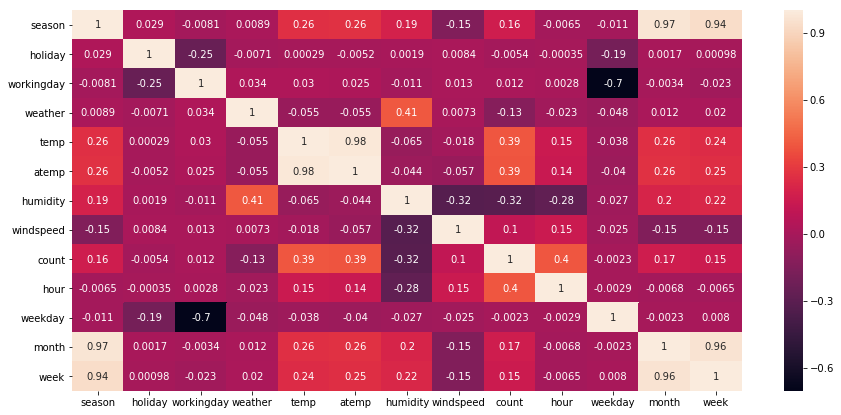

In [103]:
corr = df.drop(['casual','registered'],axis=1).corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)
plt.show()

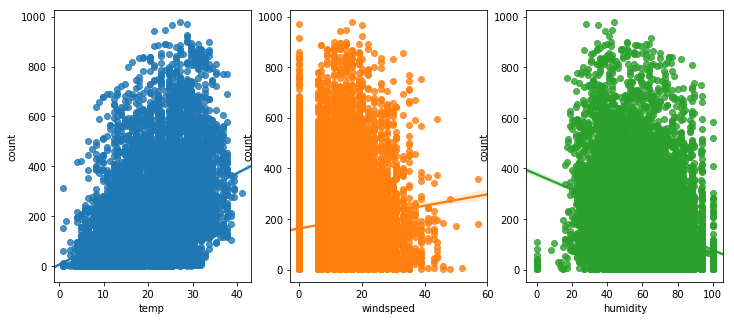

In [107]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=df,ax=ax1)
sns.regplot(x="windspeed", y="count", data=df,ax=ax2)
sns.regplot(x="humidity", y="count", data=df,ax=ax3)
plt.show()

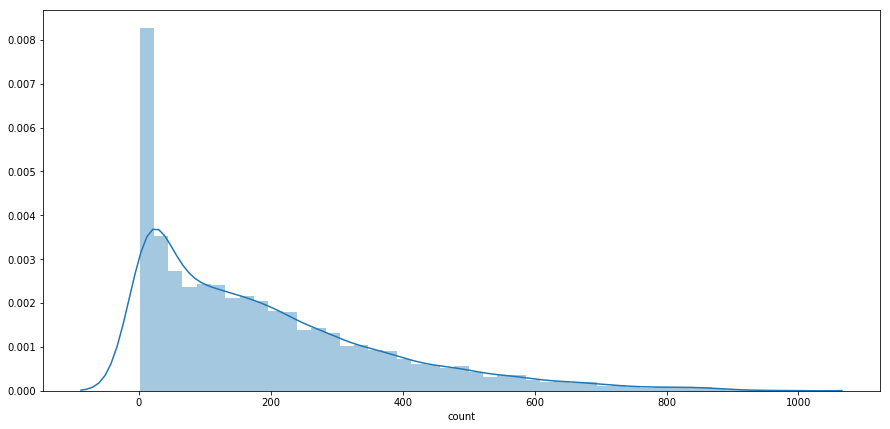

In [117]:
# This is not normally distributed
sns.distplot(df['count'])
plt.title("before applying log")
plt.xlabel("count")
plt.show()

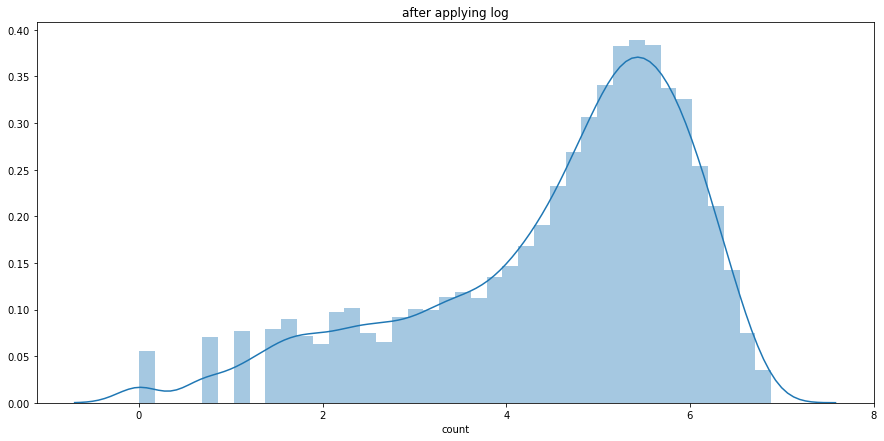

In [118]:
# This is not normally distributed
sns.distplot(np.log(df['count']))
plt.title("after applying log")
plt.xlabel("count")
plt.show()

In [120]:
df['month'].value_counts()

7     912
6     912
5     912
12    912
8     912
11    911
10    911
4     909
9     909
3     901
2     901
1     884
Name: month, dtype: int64

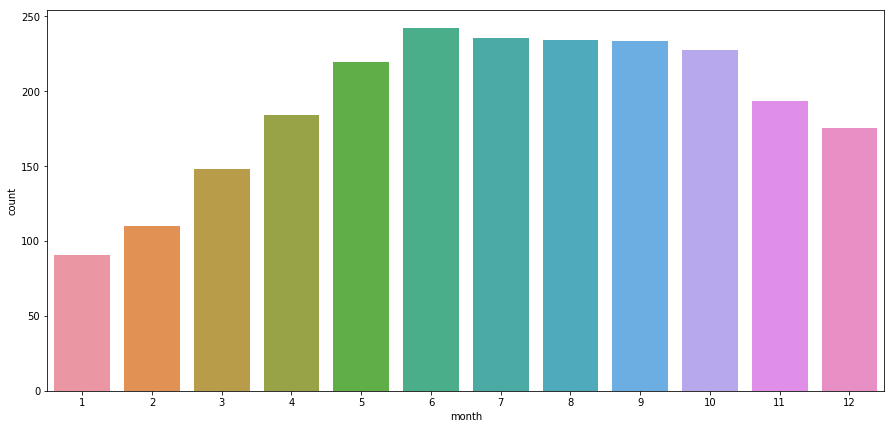

In [129]:
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
month_count=pd.DataFrame(df.groupby("month")["count"].mean()).reset_index()
sns.barplot(data=month_count,x="month",y="count",label=months)
sns.ticks(np.ara)
plt.show()